In [1]:
# Setup Python path and imports
import sys
from pathlib import Path

# Add the project root to Python path
project_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
sys.path.append(str(project_root))

# ML toolbox imports
from ml_toolbox.data_loader import DatasetManager, DataLoader

# Initialize dataset manager
dataset_path = project_root / "data_set"
dm = DatasetManager(dataset_path)

# Initialize data loader 
data_loader = DataLoader(dataset_path)

# Get dataset index and statistics
index = dm.get_index()
stats = dm.get_statistics()

print(f"Available conditions: {index['conditions']}")
print(f"Available frequencies: {index['frequencies']}")
print(f"Available loads: {index['loads']}")
print(f"Total files: {stats['total_files']}")

Available conditions: ['faulty_bearing', 'misalignment', 'system_misalignment']
Available frequencies: ['10hz', '20hz', '30hz', '40hz']
Available loads: ['no_load', 'under_load']
Total files: 126


In [2]:
from ml_toolbox.analysis import run_comprehensive_frequency_analysis

# Define frequencies to analyze
frequencies_to_analyze = ["10hz", "20hz", "30hz", "40hz"]
frequencies_to_analyze = ["20hz"] # For quick testing
max_windows_per_class = 120  
window_length = 4096 # 10Khz sampling, ~0.2s window

print(f"Analysis Configuration:")
print(f"  Frequencies: {frequencies_to_analyze}")
print(f"  Load condition: no load")
print(f"  Max windows per class: {max_windows_per_class}")
print(f"  Window length: {window_length} samples")
print(f"  Total expected windows: ~{max_windows_per_class * len(frequencies_to_analyze) * 4} (4 classes)")
print("=" * 60)

Analysis Configuration:
  Frequencies: ['20hz']
  Load condition: no load
  Max windows per class: 120
  Window length: 4096 samples
  Total expected windows: ~480 (4 classes)


In [4]:
# Run CV analysis across all frequencies
cv_results = run_comprehensive_frequency_analysis(
    data_loader, 
    frequencies_to_analyze, 
    load="no load",
    max_windows_per_class=max_windows_per_class,
    window_length=window_length,
    export_to_excel=True,
    output_dir="test_output"
)

INFO:ml_toolbox.data_loader.data_loader:Loading 16 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 16 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 120 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 120 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 120 windows
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/360 windows
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz

Starting comprehensive CV analysis for frequencies: ['20hz']
Load condition: no load
Max windows per class: 120
Excel export enabled - output directory: test_output
Starting feature extraction for 20hz...
Loading 20hz no load data...
Loaded 16 current sensor files for 20hz
Created 360 windows for 20hz


INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_e

Extracted 33 features for 20hz
Feature extraction completed for 20hz. Shape: (360, 33)
Features data written to Excel: test_output/features_20hz_no_load.xlsx
Dataset info: 360 samples, 33 features
Label distribution: {np.int64(1): np.int64(120), np.int64(2): np.int64(120), np.int64(3): np.int64(120)}
Sheets created: Dataset_Info, Feature_Names, Label_Distribution, Features_Data, Feature_Statistics, Feature_Stats_by_Condition
Starting CV evaluation for 20hz...
Evaluating model for 20hz...
20hz - Mean CV Accuracy: 0.850 ± 0.051
20hz - Precision: 0.870, Recall: 0.850, F1: 0.853
20hz CV analysis completed
CV results written to Excel: test_output/cv_results_no_load.xlsx
Sheets created: CV_Summary, CV_Scores_Detail, Label_Distribution, Analysis_Info
CV analysis completed for 1 frequencies


In [5]:
# Run SHAP analysis across all frequencies
from ml_toolbox.analysis import shap_analysis
from ml_toolbox.analysis import feature_analysis

# Run SHAP analysis for all frequencies with Excel export
oob_results, shap_results, shap_per_class_results = shap_analysis.run_comprehensive_shap_analysis(
    data_loader, 
    frequencies_to_analyze, 
    load="no load",
    max_windows_per_class=max_windows_per_class,
    window_length=window_length,
    window_overlap=0.5,
    export_to_excel=True,
    output_dir="test_output"
)

INFO:ml_toolbox.data_loader.data_loader:Loading 16 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 16 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 120 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 120 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 120 windows
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/360 windows
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz

Starting comprehensive SHAP analysis for frequencies: ['20hz']
Load condition: no load
Max windows per class: 120
CV folds: 5
Per-class analysis: Enabled
Excel export enabled - output directory: test_output
Loading 20hz no load data...
Loaded 16 current sensor files for 20hz
Created 360 windows for 20hz


INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1679.7 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_e

Extracted 33 features for 20hz
Computing feature importance for 20hz...
Computing SHAP importance for 20hz...
Computing SHAP values across 5 folds...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5
Computing per-class SHAP analysis for 20hz...
Computing per-class SHAP importance for 20hz...
Computing per-class SHAP values across 5 folds for 3 classes...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5
Per-class SHAP results written to Excel: test_output/shap_per_class_20hz_no_load.xlsx
Classes analyzed: [np.int64(1), np.int64(2), np.int64(3)]
Sheets created: Class_Summary, individual class details, Top_Features_by_Class, Feature_Ranking_Matrix, Analysis_Info
20hz analysis completed
OOB vs SHAP comparison written to Excel: test_output/oob_vs_shap_comparison_no_load.xlsx
Sheets created: Comparison_Summary, individual frequency comparisons, SHAP_Summary, Analysis_Info
SHAP analysis compl

PERFORMANCE SUMMARY ACROSS FREQUENCIES
Frequency  Mean_Accuracy  Std_Accuracy  Best_Fold  Worst_Fold  Stability_Score  N_Samples  N_Features
     20hz           0.85      0.050766   0.930556    0.805556        16.743572        360          33

CROSS-VALIDATION ANALYSIS


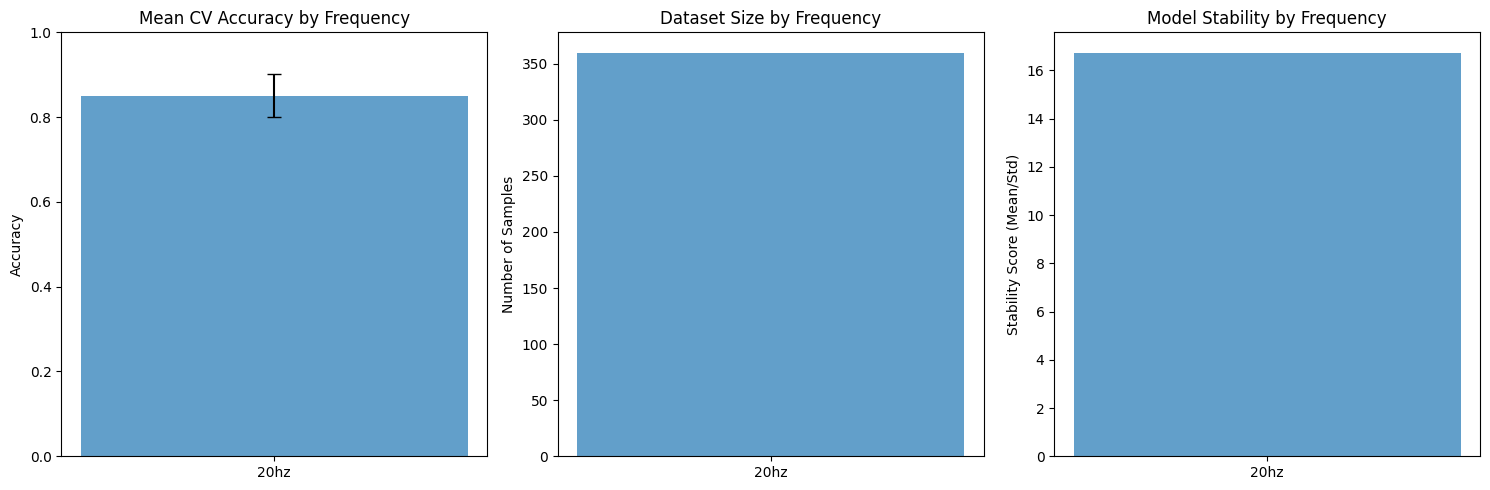

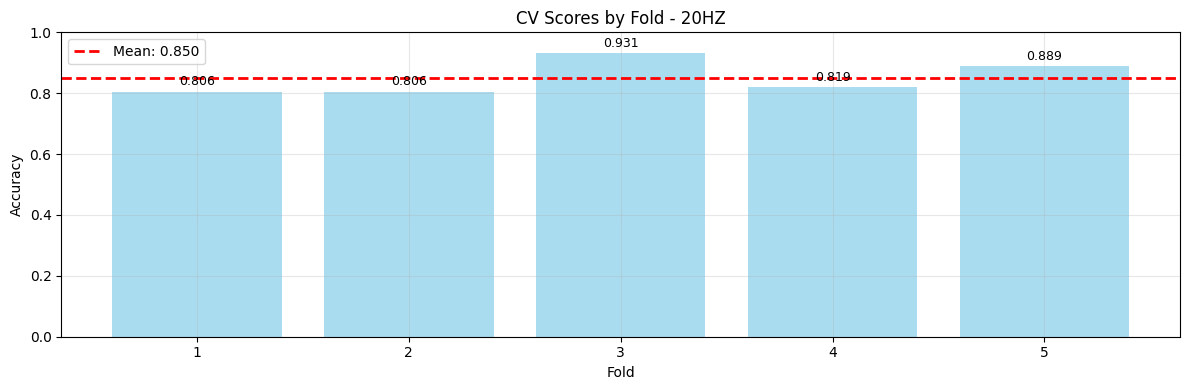

In [6]:
# Display comprehensive results
from ml_toolbox.analysis import (
    plot_cv_results_comparison, 
    create_performance_summary,
    plot_cv_scores_by_fold
)

# 1. Performance Summary Table
print("PERFORMANCE SUMMARY ACROSS FREQUENCIES")
print("=" * 60)
performance_summary = create_performance_summary(cv_results)
print(performance_summary.to_string(index=False))

# 2. Plot comprehensive CV results comparison
print("\nCROSS-VALIDATION ANALYSIS")
plot_cv_results_comparison(cv_results)
plot_cv_scores_by_fold(cv_results)

DETAILED PERFORMANCE METRICS

20HZ METRICS:
--------------------------------------------------------------------------------
  Accuracy:  0.8500
  Precision: 0.8695
  Recall:    0.8500
  F1 Score:  0.8526
  Mean CV:   0.8500 ± 0.0508

  Confusion Matrix:
                          Pred_faulty_bearing  Pred_misalignment  Pred_system_misalignment
True_faulty_bearing                       108                  0                        12
True_misalignment                          23                 94                         3
True_system_misalignment                   16                  0                       104



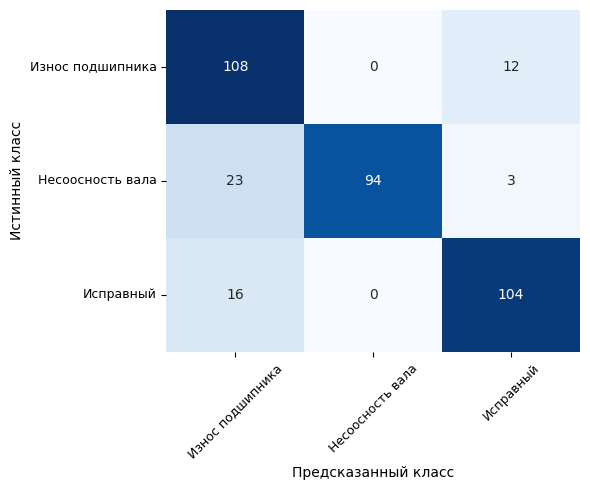


METRICS SUMMARY TABLE
Frequency  Accuracy  Precision  Recall  F1_Score  CV_Mean   CV_Std  N_Samples
     20hz      0.85   0.869548    0.85  0.852595     0.85 0.050766        360

Detailed metrics exported to: test_output/detailed_metrics_summary.xlsx


In [7]:
# Display detailed metrics including F1, Precision, Recall, and Confusion Matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get label mapping from data loader
label_mapping = data_loader.get_label_mapping()

print("DETAILED PERFORMANCE METRICS")
print("=" * 80)

for freq in frequencies_to_analyze:
    if freq not in cv_results:
        continue
    
    result = cv_results[freq]
    
    print(f"\n{freq.upper()} METRICS:")
    print("-" * 80)
    print(f"  Accuracy:  {result['accuracy']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall:    {result['recall']:.4f}")
    print(f"  F1 Score:  {result['f1_score']:.4f}")
    print(f"  Mean CV:   {result['mean_accuracy']:.4f} ± {result['std_accuracy']:.4f}")
    
    # Display confusion matrix
    print(f"\n  Confusion Matrix:")
    conf_matrix = result['confusion_matrix']
    unique_labels = result['unique_labels']
    
    # Map numeric labels to condition names
    label_names = [label_mapping.get(label, f"Unknown_{label}") for label in unique_labels]
    
    # Create DataFrame for better display
    conf_df = pd.DataFrame(
        conf_matrix,
        index=[f"True_{name}" for name in label_names],
        columns=[f"Pred_{name}" for name in label_names]
    )
    print(conf_df.to_string())
    print()

# Create visualization for confusion matrix only
n_freq = len(frequencies_to_analyze)
if n_freq > 0:
    fig, axes = plt.subplots(1, n_freq, figsize=(6*n_freq, 5))
    if n_freq == 1:
        axes = [axes]
    
    for idx, freq in enumerate(frequencies_to_analyze):
        if freq not in cv_results:
            continue
        
        result = cv_results[freq]
        
        # Confusion matrix heatmap
        conf_matrix = result['confusion_matrix']
        unique_labels = result['unique_labels']
        
        # Map numeric labels to Russian condition names
        russian_label_mapping = {
            'faulty_bearing': 'Износ подшипника',
            'misalignment': 'Несоосность вала', 
            'system_misalignment': 'Исправный',
            'healthy': 'Исправный'
        }
        
        # Get original label names and convert to Russian
        original_label_names = [label_mapping.get(label, f"Unknown_{label}") for label in unique_labels]
        russian_label_names = [russian_label_mapping.get(name, name) for name in original_label_names]
        
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=russian_label_names, yticklabels=russian_label_names,
                   ax=axes[idx], cbar=False)
        axes[idx].set_xlabel('Предсказанный класс')
        axes[idx].set_ylabel('Истинный класс')
        
        # Rotate labels for better readability
        axes[idx].tick_params(axis='x', rotation=45, labelsize=9)
        axes[idx].tick_params(axis='y', rotation=0, labelsize=9)
    
    plt.tight_layout()
    plt.show()

# Create summary table with all metrics
print("\n" + "="*80)
print("METRICS SUMMARY TABLE")
print("="*80)

metrics_summary = []
for freq in frequencies_to_analyze:
    if freq not in cv_results:
        continue
    
    result = cv_results[freq]
    metrics_summary.append({
        'Frequency': freq,
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1_Score': result['f1_score'],
        'CV_Mean': result['mean_accuracy'],
        'CV_Std': result['std_accuracy'],
        'N_Samples': result['n_samples']
    })

metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df.to_string(index=False))

# Export to Excel
metrics_excel_path = "test_output/detailed_metrics_summary.xlsx"
metrics_df.to_excel(metrics_excel_path, index=False)
print(f"\nDetailed metrics exported to: {metrics_excel_path}")


CLASS-WISE PERFORMANCE METRICS

20HZ - PER-CLASS METRICS:
--------------------------------------------------------------------------------
Class                | Precision  | Recall     | F1-Score   | Support   
--------------------------------------------------------------------------------
faulty_bearing       |     0.7347 |     0.9000 |     0.8090 |        120
misalignment         |     1.0000 |     0.7833 |     0.8785 |        120
system_misalignment  |     0.8739 |     0.8667 |     0.8703 |        120
--------------------------------------------------------------------------------
Weighted Average     |     0.8695 |     0.8500 |     0.8526 |        360



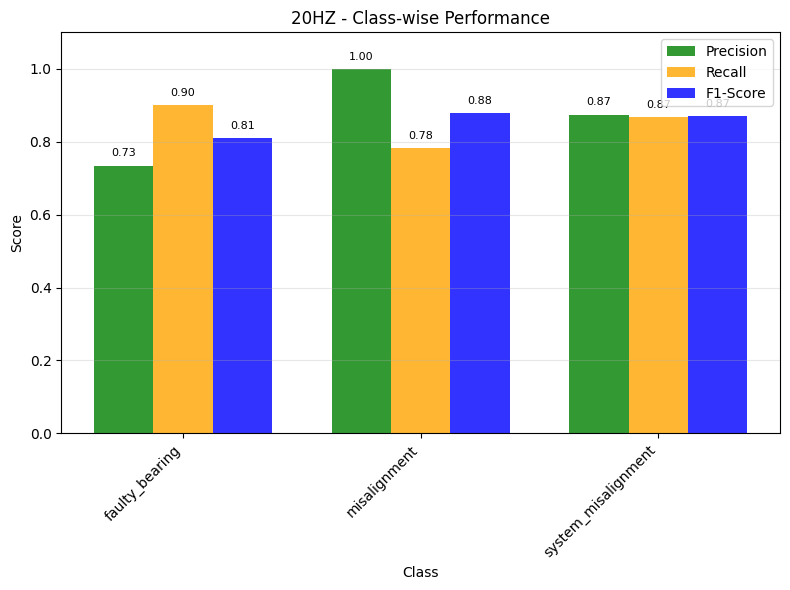


Exporting class-wise metrics to Excel...
Class-wise metrics exported to: test_output/classwise_metrics.xlsx

Class-wise performance analysis completed!


In [8]:
# Display class-wise metrics (per-class performance)
print("\n" + "="*80)
print("CLASS-WISE PERFORMANCE METRICS")
print("="*80)

for freq in frequencies_to_analyze:
    if freq not in cv_results:
        continue
    
    result = cv_results[freq]
    unique_labels = result['unique_labels']
    
    # Map numeric labels to condition names
    label_names = [label_mapping.get(label, f"Unknown_{label}") for label in unique_labels]
    
    print(f"\n{freq.upper()} - PER-CLASS METRICS:")
    print("-" * 80)
    print(f"{'Class':<20} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10} | {'Support':<10}")
    print("-" * 80)
    
    # Get per-class metrics
    precision_per_class = result['precision_per_class']
    recall_per_class = result['recall_per_class']
    f1_per_class = result['f1_per_class']
    
    # Get support (number of samples per class from confusion matrix)
    conf_matrix = result['confusion_matrix']
    support_per_class = conf_matrix.sum(axis=1)  # Sum across rows
    
    for i, (label, label_name) in enumerate(zip(unique_labels, label_names)):
        print(f"{label_name:<20} | {precision_per_class[i]:>10.4f} | {recall_per_class[i]:>10.4f} | {f1_per_class[i]:>10.4f} | {support_per_class[i]:>10.0f}")
    
    # Show weighted averages for comparison
    print("-" * 80)
    print(f"{'Weighted Average':<20} | {result['precision']:>10.4f} | {result['recall']:>10.4f} | {result['f1_score']:>10.4f} | {result['n_samples']:>10.0f}")
    print()

# Create visualization of class-wise performance
n_freq = len(frequencies_to_analyze)
if n_freq > 0:
    fig, axes = plt.subplots(1, n_freq, figsize=(8*n_freq, 6))
    if n_freq == 1:
        axes = [axes]
    
    for idx, freq in enumerate(frequencies_to_analyze):
        if freq not in cv_results:
            continue
        
        result = cv_results[freq]
        unique_labels = result['unique_labels']
        label_names = [label_mapping.get(label, f"Unknown_{label}") for label in unique_labels]
        
        # Get per-class metrics
        precision_per_class = result['precision_per_class']
        recall_per_class = result['recall_per_class']
        f1_per_class = result['f1_per_class']
        
        # Create grouped bar chart
        x = np.arange(len(label_names))
        width = 0.25
        
        axes[idx].bar(x - width, precision_per_class, width, label='Precision', alpha=0.8, color='green')
        axes[idx].bar(x, recall_per_class, width, label='Recall', alpha=0.8, color='orange')
        axes[idx].bar(x + width, f1_per_class, width, label='F1-Score', alpha=0.8, color='blue')
        
        axes[idx].set_xlabel('Class')
        axes[idx].set_ylabel('Score')
        axes[idx].set_title(f'{freq.upper()} - Class-wise Performance')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(label_names, rotation=45, ha='right')
        axes[idx].set_ylim(0, 1.1)
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, (p, r, f) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
            axes[idx].text(i - width, p + 0.02, f'{p:.2f}', ha='center', va='bottom', fontsize=8)
            axes[idx].text(i, r + 0.02, f'{r:.2f}', ha='center', va='bottom', fontsize=8)
            axes[idx].text(i + width, f + 0.02, f'{f:.2f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Export class-wise metrics to Excel
print("\nExporting class-wise metrics to Excel...")
classwise_data = []

for freq in frequencies_to_analyze:
    if freq not in cv_results:
        continue
    
    result = cv_results[freq]
    unique_labels = result['unique_labels']
    label_names = [label_mapping.get(label, f"Unknown_{label}") for label in unique_labels]
    
    precision_per_class = result['precision_per_class']
    recall_per_class = result['recall_per_class']
    f1_per_class = result['f1_per_class']
    
    conf_matrix = result['confusion_matrix']
    support_per_class = conf_matrix.sum(axis=1)
    
    for i, (label, label_name) in enumerate(zip(unique_labels, label_names)):
        classwise_data.append({
            'Frequency': freq,
            'Class_Label': label,
            'Class_Name': label_name,
            'Precision': precision_per_class[i],
            'Recall': recall_per_class[i],
            'F1_Score': f1_per_class[i],
            'Support': support_per_class[i]
        })

classwise_df = pd.DataFrame(classwise_data)
classwise_excel_path = "test_output/classwise_metrics.xlsx"
classwise_df.to_excel(classwise_excel_path, index=False)
print(f"Class-wise metrics exported to: {classwise_excel_path}")
print(f"\nClass-wise performance analysis completed!")


FEATURE IMPORTANCE ANALYSIS RESULTS

TOP 10 SHAP FEATURES BY FREQUENCY:

20HZ:
   1. current_phase_a_rms       | SHAP: 0.1126 ± 0.0047
   2. current_phase_a_current_phase_b_correlation | SHAP: 0.0640 ± 0.0028
   3. current_phase_a_env_thd_power_frac | SHAP: 0.0206 ± 0.0026
   4. current_phase_a_env_fundamental_power_ratio | SHAP: 0.0141 ± 0.0026
   5. current_phase_a_env_harmonic_regularity | SHAP: 0.0137 ± 0.0024
   6. current_phase_a_env_centroid | SHAP: 0.0104 ± 0.0020
   7. load_under_load           | SHAP: 0.0102 ± 0.0010
   8. current_phase_a_kurtosis  | SHAP: 0.0090 ± 0.0011
   9. current_phase_a_env_skew  | SHAP: 0.0089 ± 0.0019
  10. current_phase_a_form_factor | SHAP: 0.0074 ± 0.0028

TOP 10 MDI FEATURES BY FREQUENCY:

20HZ:
   1. current_phase_a_rms       | MDI: 0.2673 ± 0.0065
   2. current_phase_a_current_phase_b_correlation | MDI: 0.1593 ± 0.0047
   3. load_under_load           | MDI: 0.0179 ± 0.0018
   4. current_phase_a_env_harmonic_regularity | MDI: 0.0246 ± 0.0020
   

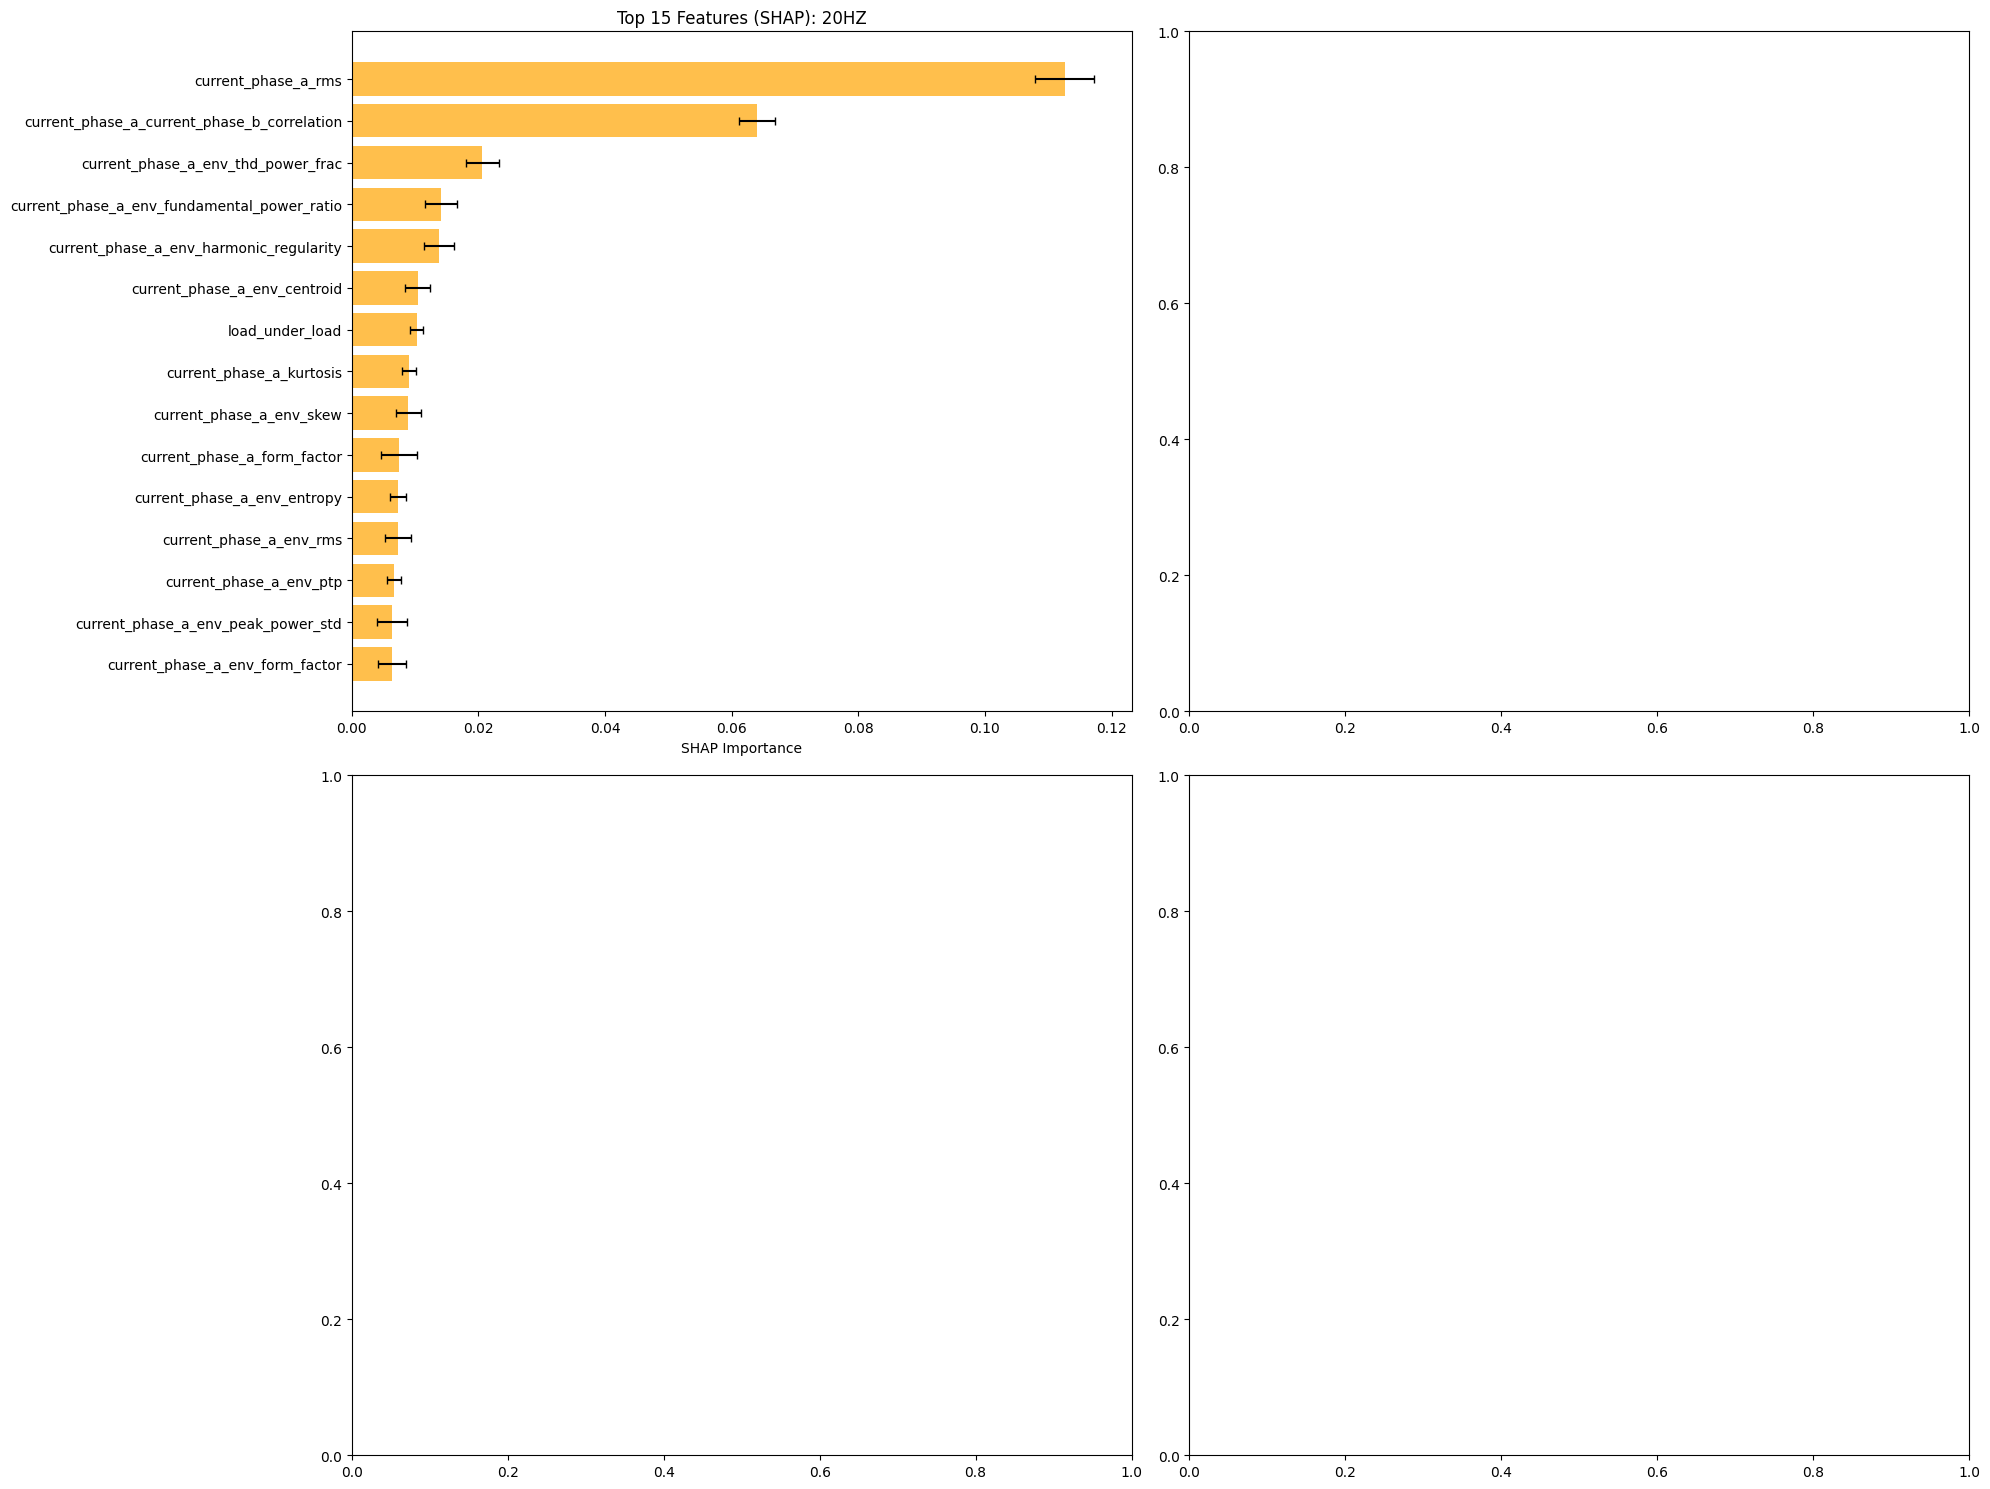


MDI FEATURE IMPORTANCE VISUALIZATION


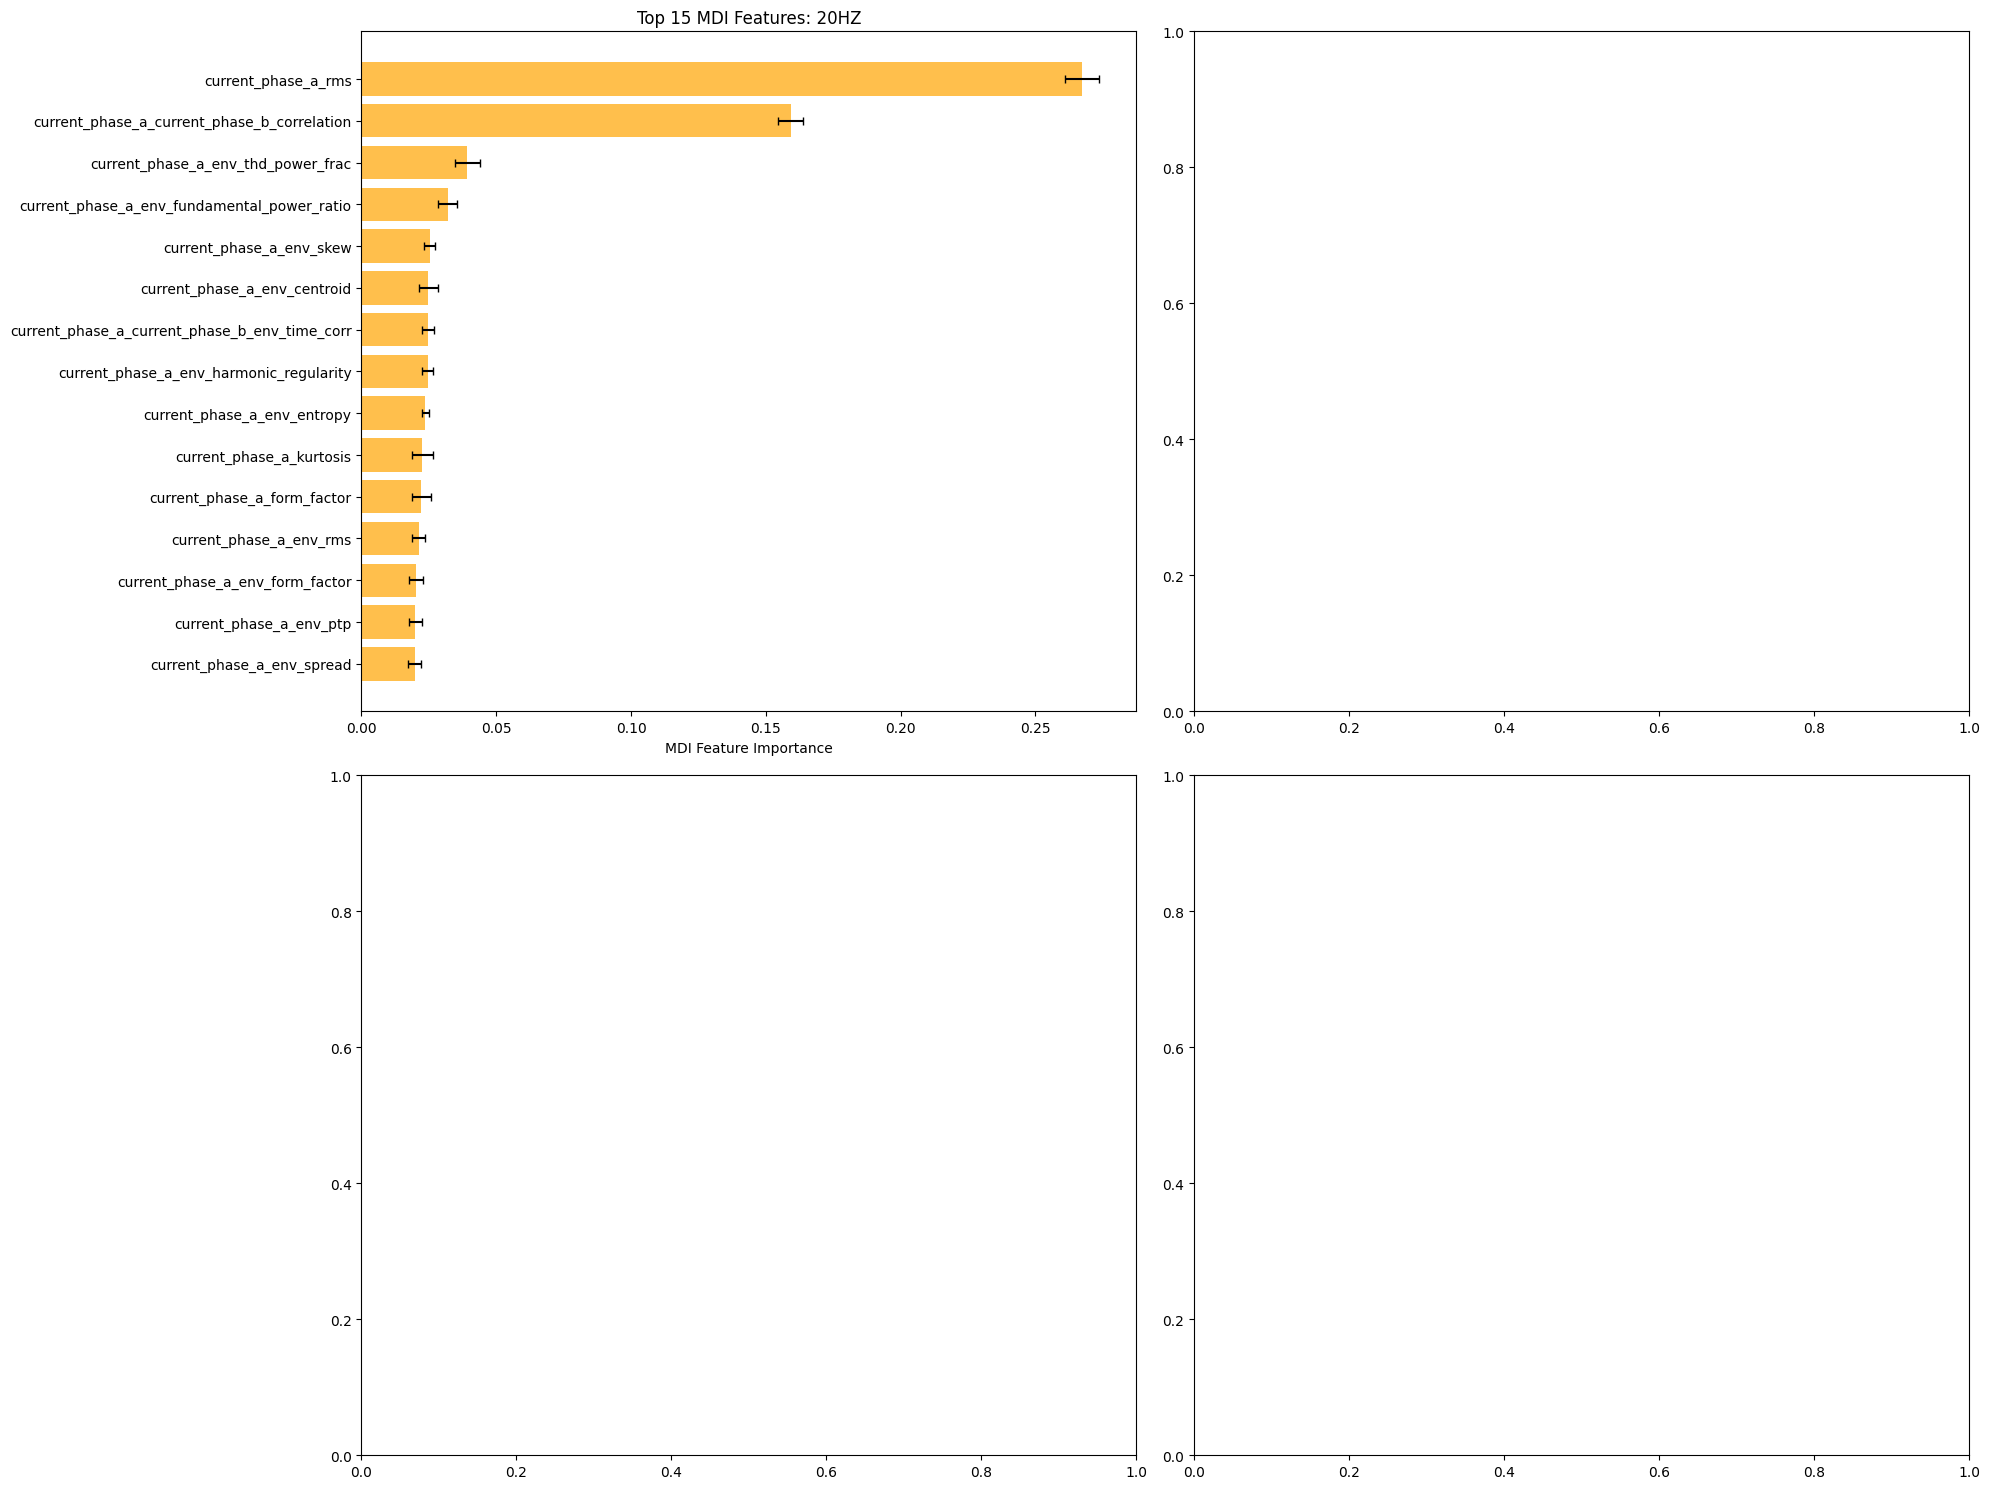


PM FEATURE IMPORTANCE VISUALIZATION


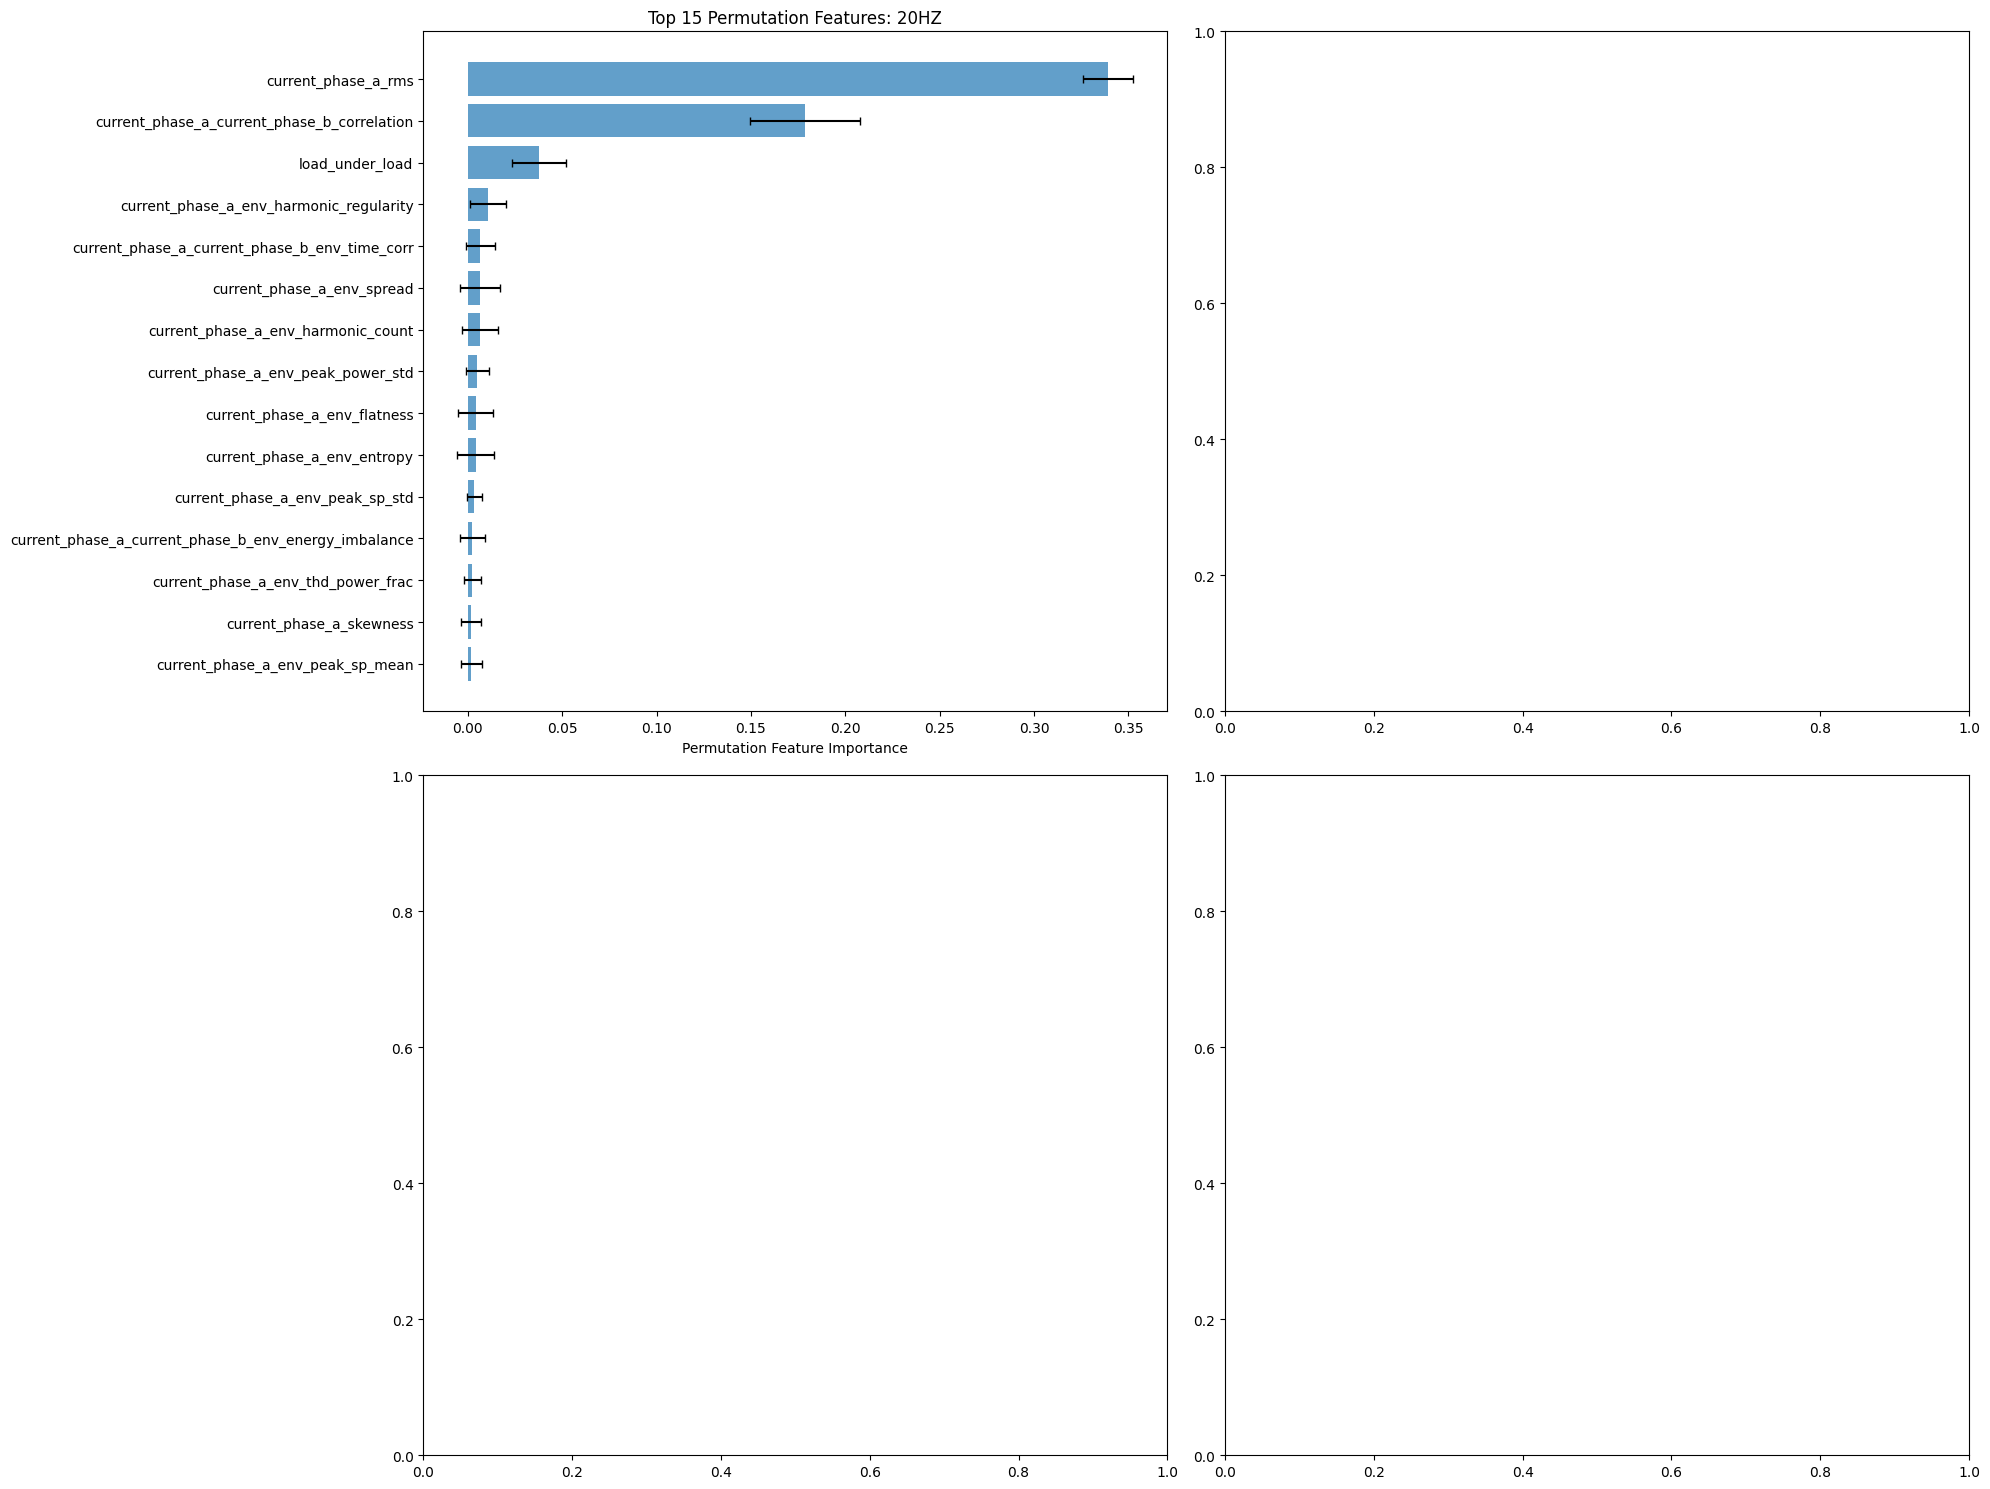


PM vs SHAP COMPARISON FOR 20HZ:
   Importance correlation: 0.981
   Mean agreement score: 0.217


In [9]:
# Feature importance analysis results from SHAP
print("FEATURE IMPORTANCE ANALYSIS RESULTS")
print("=" * 60)

# 1. Show top SHAP features for each frequency
print("\nTOP 10 SHAP FEATURES BY FREQUENCY:")
for freq in frequencies_to_analyze:
    if freq in shap_results:
        print(f"\n{freq.upper()}:")
        top_10 = shap_results[freq].head(10)
        for i, (_, row) in enumerate(top_10.iterrows(), 1):
            print(f"  {i:2d}. {row['Feature']:<25} | SHAP: {row['Mean_SHAP_Importance']:.4f} ± {row['Std_SHAP_Importance']:.4f}")

# 1.5 Show top MDI features for comparison
print(f"\nTOP 10 MDI FEATURES BY FREQUENCY:")
for freq in frequencies_to_analyze:
    if freq in oob_results:
        print(f"\n{freq.upper()}:")
        top_10 = oob_results[freq].head(10)
        for i, (_, row) in enumerate(top_10.iterrows(), 1):
            print(f"  {i:2d}. {row['Feature']:<25} | MDI: {row['Mean_MDI_Importance']:.4f} ± {row['Std_MDI_Importance']:.4f}")

# 2. Show top PM features for comparison
print(f"\nTOP 10 PM FEATURES BY FREQUENCY:")
for freq in frequencies_to_analyze:
    if freq in oob_results:
        print(f"\n{freq.upper()}:")
        top_10 = oob_results[freq].head(10)
        for i, (_, row) in enumerate(top_10.iterrows(), 1):
            print(f"  {i:2d}. {row['Feature']:<25} | PM: {row['Mean_Importance']:.4f} ± {row['Std_Importance']:.4f}")

# 3. Plot SHAP importance comparison
print(f"\nSHAP FEATURE IMPORTANCE VISUALIZATION")
shap_analysis.plot_shap_importance_comparison(shap_results, top_n=15)

# Plot MDI importance comparison
print(f"\nMDI FEATURE IMPORTANCE VISUALIZATION")
feature_analysis.plot_mdi_importance_comparison(oob_results, top_n=15)

# Plot PM importance comparison 
print(f"\nPM FEATURE IMPORTANCE VISUALIZATION")
feature_analysis.plot_permuted_importance_comparison(oob_results, top_n=15)

# 4. Compare PM vs SHAP for one frequency as example
if "20hz" in oob_results and "20hz" in shap_results:
    print(f"\nPM vs SHAP COMPARISON FOR 20HZ:")
    comparison_example = shap_analysis.compare_oob_vs_shap_importance(oob_results["20hz"], shap_results["20hz"])
    correlation = comparison_example['OOB_Normalized'].corr(comparison_example['SHAP_Normalized'])
    print(f"   Importance correlation: {correlation:.3f}")
    print(f"   Mean agreement score: {comparison_example['Agreement_Score'].mean():.3f}")

In [10]:
# INCREMENTAL FEATURE EVALUATION
# Test how performance changes as we add features incrementally based on different importance metrics
print("INCREMENTAL FEATURE EVALUATION")
print("=" * 60)

from ml_toolbox.analysis import evaluate_incremental_features_cv, plot_incremental_feature_performance, write_incremental_results_to_excel
from ml_toolbox.analysis.feature_analysis import extract_features_for_frequency

# Choose one frequency for detailed incremental analysis
test_frequency = "20hz"
print(f"Running incremental analysis for {test_frequency}")

# Extract features for the test frequency
features, labels, feature_names, metadata = extract_features_for_frequency(
    data_loader, test_frequency, "no load", 
    max_windows_per_class=max_windows_per_class, 
    window_size=window_length, 
    overlap_ratio=0.5
)

print(f"Extracted features shape: {features.shape}")
print(f"Number of feature names: {len(feature_names)}")

# Get feature importance rankings from different methods
shap_ranking = shap_results[test_frequency]['Feature'].tolist()
mdi_ranking = oob_results[test_frequency].sort_values('Mean_MDI_Importance', ascending=False)['Feature'].tolist()
pm_ranking = oob_results[test_frequency].sort_values('Mean_Importance', ascending=False)['Feature'].tolist()

# Create feature order indices for each ranking method
def get_feature_indices(ranking, feature_names):
    """Convert feature name ranking to feature indices"""
    indices = []
    for feature_name in ranking:
        if feature_name in feature_names:
            indices.append(feature_names.index(feature_name))
    return indices

shap_indices = get_feature_indices(shap_ranking, feature_names)
mdi_indices = get_feature_indices(mdi_ranking, feature_names)
pm_indices = get_feature_indices(pm_ranking, feature_names)

print(f"SHAP ranking available features: {len(shap_indices)}")
print(f"MDI ranking available features: {len(mdi_indices)}")
print(f"PM ranking available features: {len(pm_indices)}")

INFO:ml_toolbox.data_loader.data_loader:Loading 16 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 16 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 120 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 120 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 120 windows
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)


INCREMENTAL FEATURE EVALUATION
Running incremental analysis for 20hz
Loading 20hz no load data...
Loaded 16 current sensor files for 20hz
Created 360 windows for 20hz


INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/360 windows
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1674.8 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency: 1655.3 Hz (expected: 1670.0 Hz)
INFO:ml_toolbox.data_loader.feature_extraction:Detected carrier frequency

Extracted 33 features for 20hz
Extracted features shape: (360, 33)
Number of feature names: 33
SHAP ranking available features: 33
MDI ranking available features: 33
PM ranking available features: 33



INCREMENTAL EVALUATION: SHAP-RANKED FEATURES
Starting incremental feature evaluation...
Evaluating incremental feature sets from 1 to 30 features
Feature order: [0, 23, 12, 14, 16, 8, 32, 2, 6, 3, 10, 4, 5, 18, 7, 24, 9, 25, 11, 22, 30, 29, 1, 27, 19, 26, 28, 13, 21, 17]
Evaluating with 1 feature(s): current_phase_a_rms
  → Mean CV Accuracy: 0.8333 ± 0.0278
Evaluating with 2 feature(s): current_phase_a_rms...current_phase_a_current_phase_b_correlation
  → Mean CV Accuracy: 0.9694 ± 0.0162
  → Improvement: +0.1361
Evaluating with 3 feature(s): current_phase_a_rms...current_phase_a_env_thd_power_frac
  → Mean CV Accuracy: 0.9389 ± 0.0242
  → Improvement: -0.0306
Evaluating with 4 feature(s): current_phase_a_rms...current_phase_a_env_fundamental_power_ratio
  → Mean CV Accuracy: 0.9472 ± 0.0377
  → Improvement: +0.0083
Evaluating with 5 feature(s): current_phase_a_rms...current_phase_a_env_harmonic_regularity
  → Mean CV Accuracy: 0.9417 ± 0.0297
  → Improvement: -0.0056
Evaluating with 

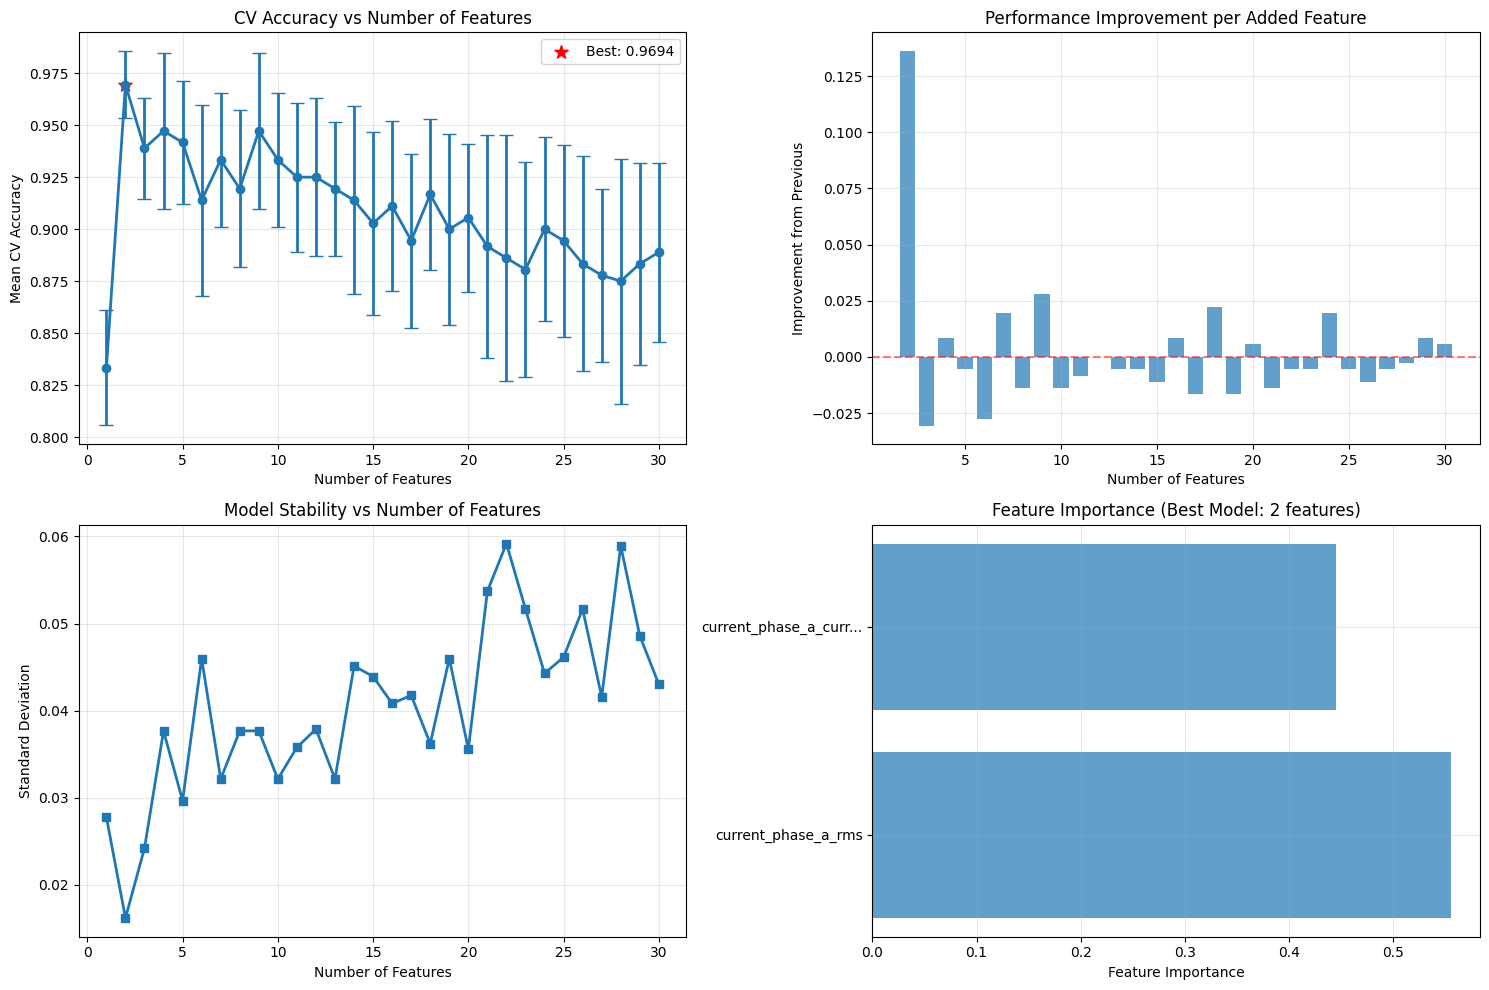

In [11]:
# Run incremental evaluation for SHAP-ranked features
print("\n" + "="*60)
print("INCREMENTAL EVALUATION: SHAP-RANKED FEATURES")
print("="*60)

shap_incremental_results = evaluate_incremental_features_cv(
    features=features,
    labels=labels,
    feature_names=feature_names,
    feature_order=shap_indices,
    max_features=min(30, len(shap_indices)),  # Limit to top 30 features
    cv_folds=5
)

print(f"\nSHAP Results Summary:")
print(f"  Best accuracy: {shap_incremental_results['best_accuracy']:.4f}")
print(f"  Optimal number of features: {shap_incremental_results['best_n_features']}")

# Plot SHAP incremental results
print("\nSHAP Feature Addition Performance:")
plot_incremental_feature_performance(shap_incremental_results)


INCREMENTAL EVALUATION: MDI-RANKED FEATURES
Starting incremental feature evaluation...
Evaluating incremental feature sets from 1 to 30 features
Feature order: [0, 23, 12, 4, 16, 14, 10, 5, 3, 6, 2, 9, 11, 28, 19, 27, 8, 25, 31, 7, 26, 1, 18, 29, 22, 24, 13, 17, 21, 20]
Evaluating with 1 feature(s): current_phase_a_rms
  → Mean CV Accuracy: 0.8500 ± 0.0204
Evaluating with 2 feature(s): current_phase_a_rms...current_phase_a_current_phase_b_correlation
  → Mean CV Accuracy: 0.9472 ± 0.0136
  → Improvement: +0.0972
Evaluating with 3 feature(s): current_phase_a_rms...current_phase_a_env_thd_power_frac
  → Mean CV Accuracy: 0.9278 ± 0.0322
  → Improvement: -0.0194
Evaluating with 4 feature(s): current_phase_a_rms...current_phase_a_env_rms
  → Mean CV Accuracy: 0.9389 ± 0.0299
  → Improvement: +0.0111
Evaluating with 5 feature(s): current_phase_a_rms...current_phase_a_env_harmonic_regularity
  → Mean CV Accuracy: 0.9389 ± 0.0242
  → Improvement: +0.0000
Evaluating with 6 feature(s): current

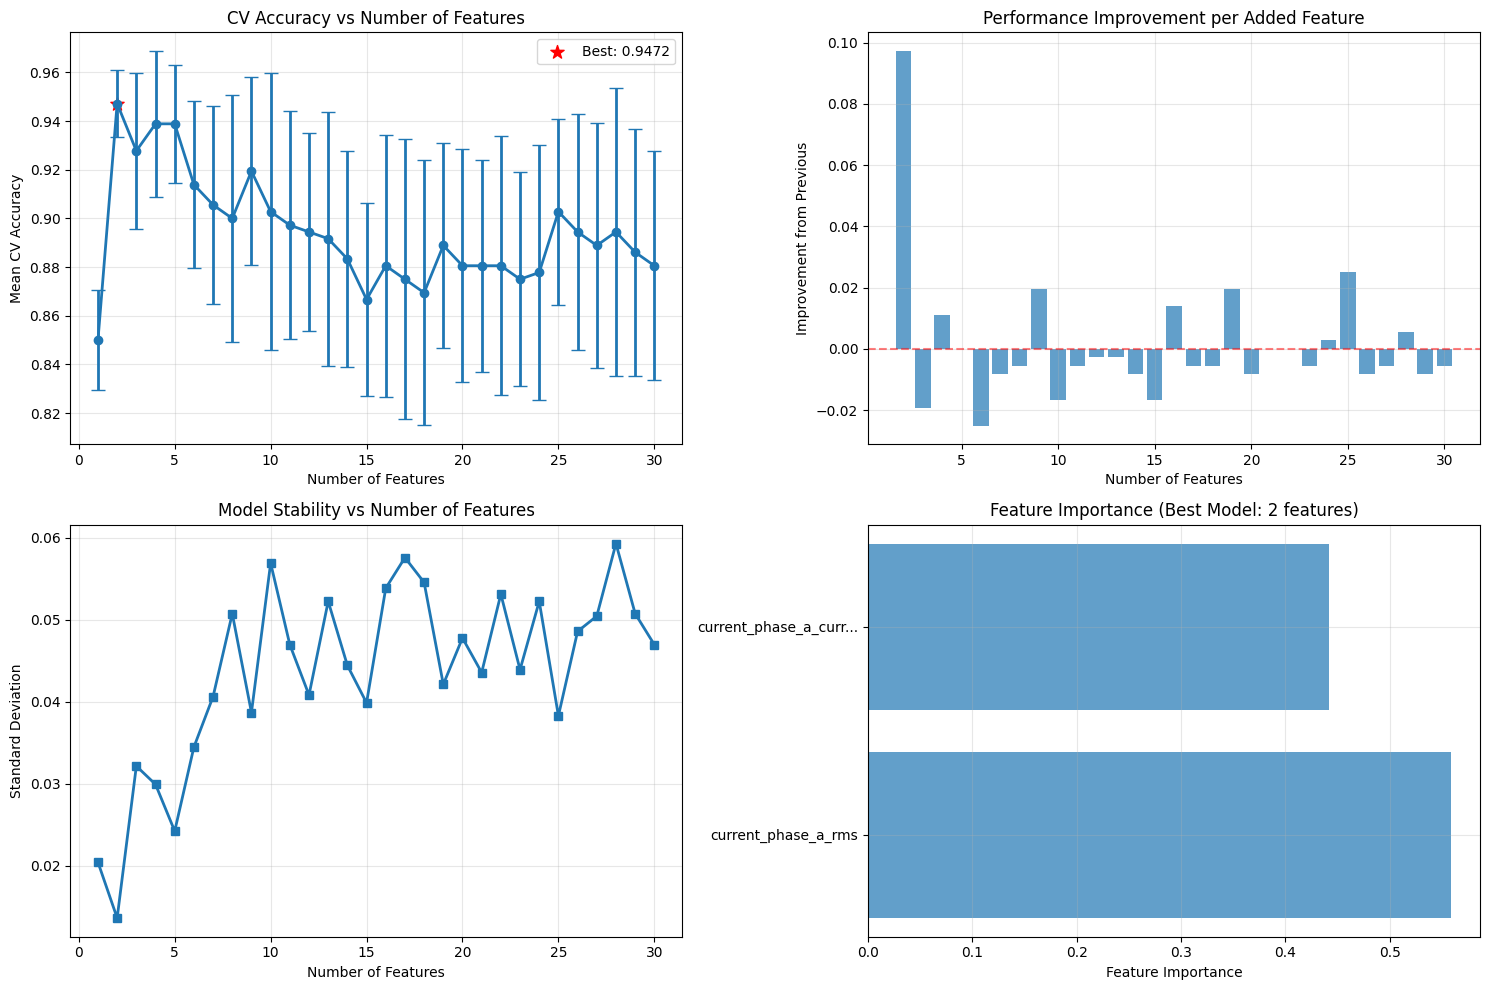

In [11]:
# Run incremental evaluation for MDI-ranked features
print("\n" + "="*60)
print("INCREMENTAL EVALUATION: MDI-RANKED FEATURES")
print("="*60)

mdi_incremental_results = evaluate_incremental_features_cv(
    features=features,
    labels=labels,
    feature_names=feature_names,
    feature_order=mdi_indices,
    max_features=min(30, len(mdi_indices)),  # Limit to top 30 features
    cv_folds=5
)

print(f"\nMDI Results Summary:")
print(f"  Best accuracy: {mdi_incremental_results['best_accuracy']:.4f}")
print(f"  Optimal number of features: {mdi_incremental_results['best_n_features']}")

# Plot MDI incremental results
print("\nMDI Feature Addition Performance:")
plot_incremental_feature_performance(mdi_incremental_results)


INCREMENTAL EVALUATION: PERMUTATION-RANKED FEATURES
Starting incremental feature evaluation...
Evaluating incremental feature sets from 1 to 30 features
Feature order: [0, 23, 31, 16, 2, 14, 30, 3, 27, 17, 1, 7, 15, 13, 24, 25, 20, 12, 11, 28, 19, 9, 26, 22, 10, 21, 18, 6, 4, 29]
Evaluating with 1 feature(s): current_phase_a_rms
  → Mean CV Accuracy: 0.8500 ± 0.0204
Evaluating with 2 feature(s): current_phase_a_rms...current_phase_a_current_phase_b_correlation
  → Mean CV Accuracy: 0.9472 ± 0.0136
  → Improvement: +0.0972
Evaluating with 3 feature(s): current_phase_a_rms...load_under_load
  → Mean CV Accuracy: 0.9667 ± 0.0188
  → Improvement: +0.0194
Evaluating with 4 feature(s): current_phase_a_rms...current_phase_a_env_harmonic_regularity
  → Mean CV Accuracy: 0.9583 ± 0.0248
  → Improvement: -0.0083
Evaluating with 5 feature(s): current_phase_a_rms...current_phase_a_kurtosis
  → Mean CV Accuracy: 0.9528 ± 0.0258
  → Improvement: -0.0056
Evaluating with 6 feature(s): current_phase_a

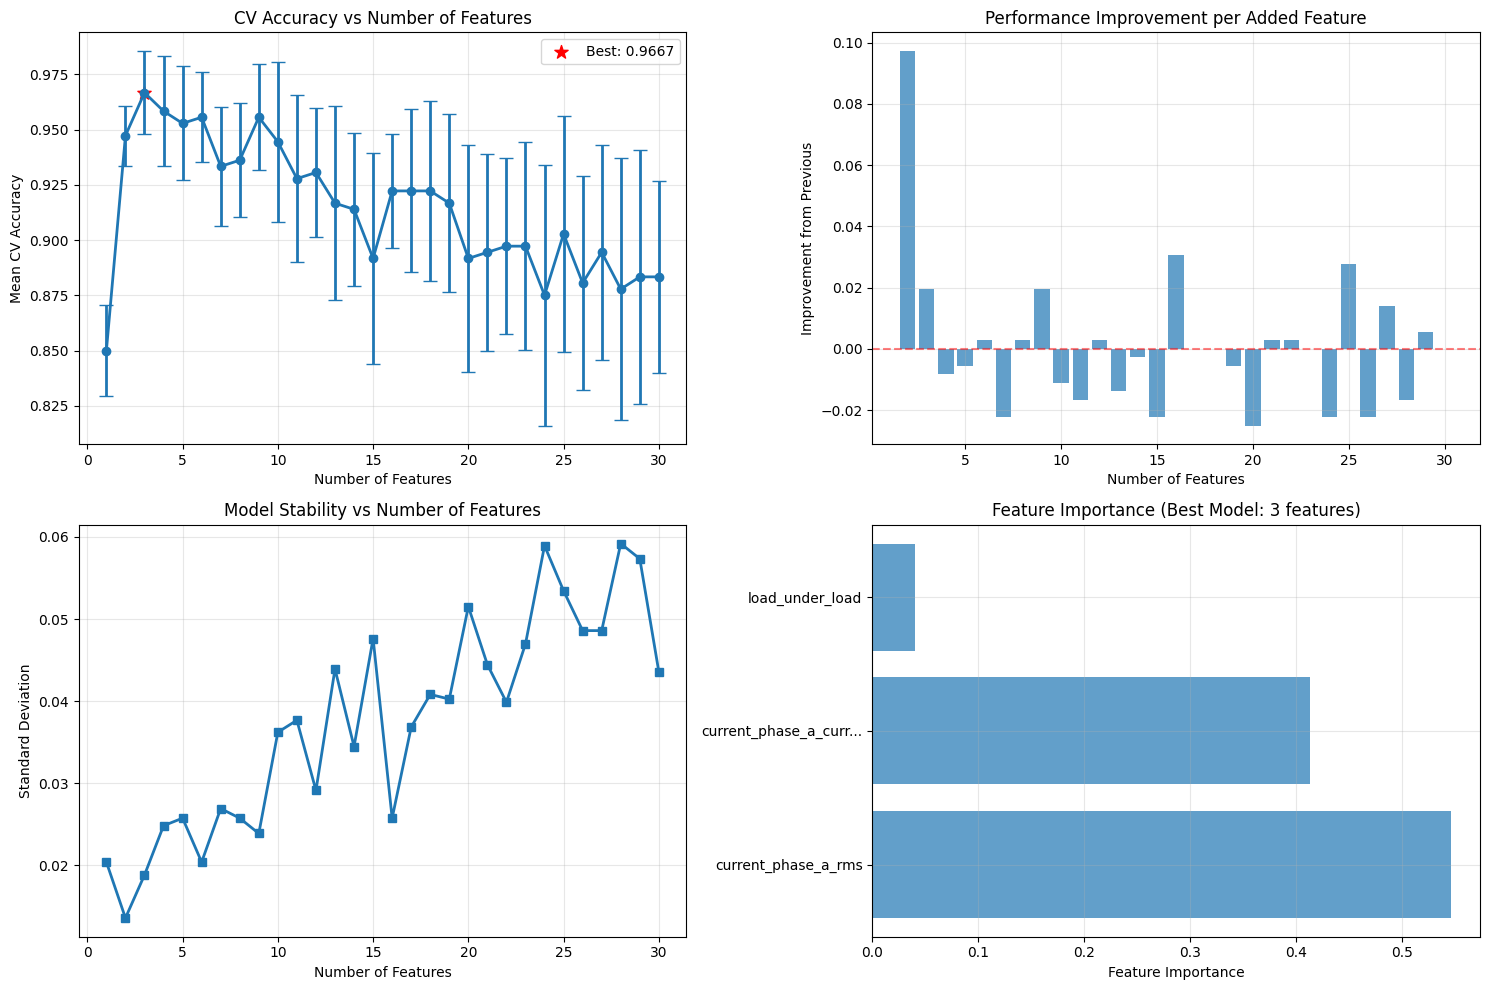

In [12]:
# Run incremental evaluation for Permutation-ranked features
print("\n" + "="*60)
print("INCREMENTAL EVALUATION: PERMUTATION-RANKED FEATURES")
print("="*60)

pm_incremental_results = evaluate_incremental_features_cv(
    features=features,
    labels=labels,
    feature_names=feature_names,
    feature_order=pm_indices,
    max_features=min(30, len(pm_indices)),  # Limit to top 30 features
    cv_folds=5
)

print(f"\nPermutation Results Summary:")
print(f"  Best accuracy: {pm_incremental_results['best_accuracy']:.4f}")
print(f"  Optimal number of features: {pm_incremental_results['best_n_features']}")

# Plot PM incremental results
print("\nPermutation Feature Addition Performance:")
plot_incremental_feature_performance(pm_incremental_results)

In [13]:
# COMPARATIVE ANALYSIS OF FEATURE RANKING METHODS
print("\n" + "="*80)
print("COMPARATIVE ANALYSIS: SHAP vs MDI vs PERMUTATION RANKING")
print("="*80)

# Create comparison summary
import pandas as pd

comparison_data = []
methods = ['SHAP', 'MDI', 'Permutation']
results = [shap_incremental_results, mdi_incremental_results, pm_incremental_results]

for method, result in zip(methods, results):
    comparison_data.append({
        'Ranking_Method': method,
        'Best_Accuracy': result['best_accuracy'],
        'Optimal_Features': result['best_n_features'],
        'Total_Samples': result['n_samples'],
        'Features_Evaluated': len(result['results'])
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Best_Accuracy', ascending=False)
print("\nCOMPARISON SUMMARY:")
print(comparison_df.to_string(index=False))

# Find best performing method
best_method = comparison_df.iloc[0]['Ranking_Method']
best_accuracy = comparison_df.iloc[0]['Best_Accuracy']
print(f"\nBest performing ranking method: {best_method} with {best_accuracy:.4f} accuracy")

# Show convergence comparison
print(f"\nCONVERGENCE ANALYSIS:")
print(f"  SHAP:        {shap_incremental_results['best_n_features']} features needed for best performance")
print(f"  MDI:         {mdi_incremental_results['best_n_features']} features needed for best performance") 
print(f"  Permutation: {pm_incremental_results['best_n_features']} features needed for best performance")

# Export results to Excel
print(f"\nExporting detailed results to Excel...")
for method, result in zip(methods, results):
    output_path = f"test_output/incremental_{method.lower()}_{test_frequency}.xlsx"
    write_incremental_results_to_excel(result, output_path, frequency=test_frequency)
    print(f"  {method} results saved to: {output_path}")

print(f"\nIncremental feature analysis completed for {test_frequency}")


COMPARATIVE ANALYSIS: SHAP vs MDI vs PERMUTATION RANKING

COMPARISON SUMMARY:
Ranking_Method  Best_Accuracy  Optimal_Features  Total_Samples  Features_Evaluated
   Permutation       0.966667                 3            360                  30
          SHAP       0.950000                 3            360                  30
           MDI       0.947222                 2            360                  30

Best performing ranking method: Permutation with 0.9667 accuracy

CONVERGENCE ANALYSIS:
  SHAP:        3 features needed for best performance
  MDI:         2 features needed for best performance
  Permutation: 3 features needed for best performance

Exporting detailed results to Excel...
Incremental results written to Excel: test_output/incremental_shap_20hz.xlsx
  SHAP results saved to: test_output/incremental_shap_20hz.xlsx
Incremental results written to Excel: test_output/incremental_mdi_20hz.xlsx
  MDI results saved to: test_output/incremental_mdi_20hz.xlsx
Incremental results


SIDE-BY-SIDE PERFORMANCE VISUALIZATION


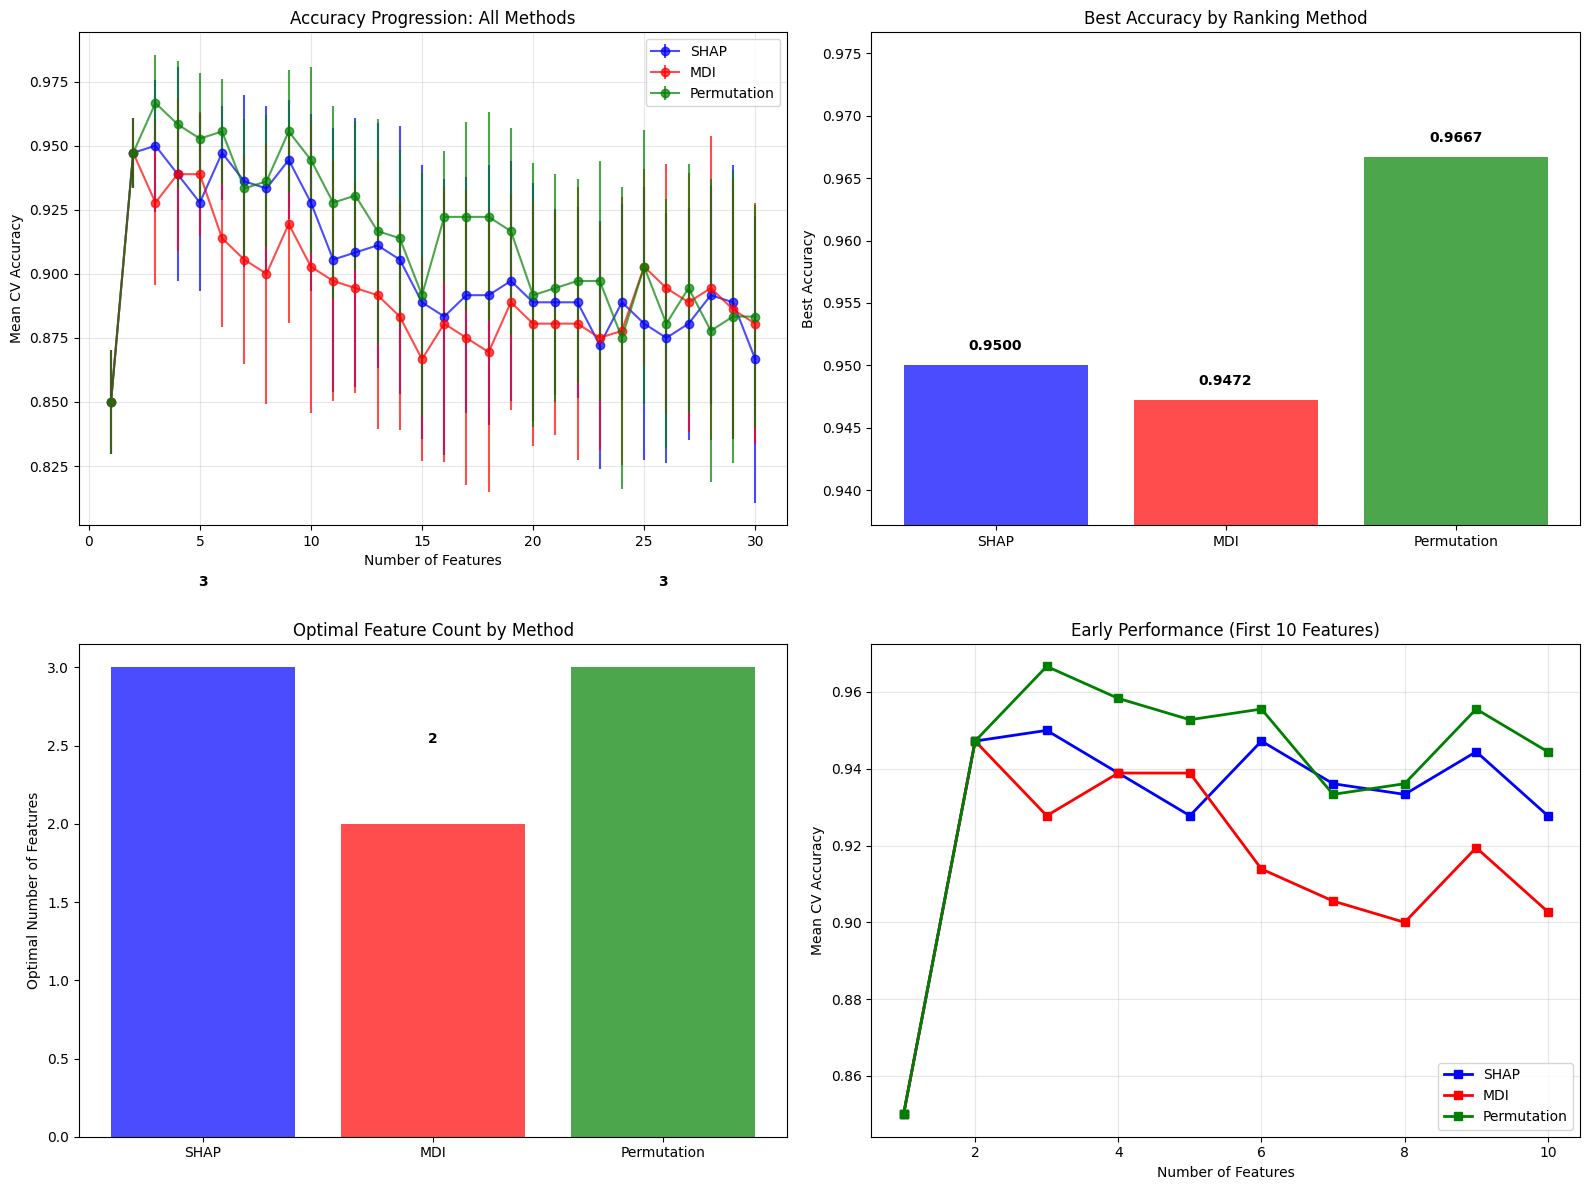


TOP 5 FEATURES COMPARISON:
------------------------------------------------------------
Position 1:
  SHAP        : current_phase_a_rms            | Acc: 0.8500
  MDI         : current_phase_a_rms            | Acc: 0.8500
  Permutation : current_phase_a_rms            | Acc: 0.8500

Position 2:
  SHAP        : current_phase_a_current_phase_b_correlation | Acc: 0.9472
  MDI         : current_phase_a_current_phase_b_correlation | Acc: 0.9472
  Permutation : current_phase_a_current_phase_b_correlation | Acc: 0.9472

Position 3:
  SHAP        : current_phase_a_env_harmonic_regularity | Acc: 0.9500
  MDI         : current_phase_a_env_thd_power_frac | Acc: 0.9278
  Permutation : load_under_load                | Acc: 0.9667

Position 4:
  SHAP        : current_phase_a_env_thd_power_frac | Acc: 0.9389
  MDI         : current_phase_a_env_rms        | Acc: 0.9389
  Permutation : current_phase_a_env_harmonic_regularity | Acc: 0.9583

Position 5:
  SHAP        : current_phase_a_env_rms        | A

In [14]:
# SIDE-BY-SIDE PERFORMANCE COMPARISON VISUALIZATION
print("\n" + "="*80)
print("SIDE-BY-SIDE PERFORMANCE VISUALIZATION")
print("="*80)

import matplotlib.pyplot as plt
import numpy as np

# Create a comprehensive comparison plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

methods = ['SHAP', 'MDI', 'Permutation']
results = [shap_incremental_results, mdi_incremental_results, pm_incremental_results]
colors = ['blue', 'red', 'green']

# 1. Accuracy progression comparison
for method, result, color in zip(methods, results, colors):
    n_features_list = [r['n_features'] for r in result['results']]
    mean_accuracies = [r['mean_accuracy'] for r in result['results']]
    std_accuracies = [r['std_accuracy'] for r in result['results']]
    
    axes[0, 0].errorbar(n_features_list, mean_accuracies, yerr=std_accuracies, 
                       label=method, color=color, marker='o', alpha=0.7)

axes[0, 0].set_xlabel('Number of Features')
axes[0, 0].set_ylabel('Mean CV Accuracy')
axes[0, 0].set_title('Accuracy Progression: All Methods')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Best accuracy comparison
best_accuracies = [result['best_accuracy'] for result in results]
axes[0, 1].bar(methods, best_accuracies, color=colors, alpha=0.7)
axes[0, 1].set_ylabel('Best Accuracy')
axes[0, 1].set_title('Best Accuracy by Ranking Method')
axes[0, 1].set_ylim([min(best_accuracies) - 0.01, max(best_accuracies) + 0.01])

# Add value labels on bars
for i, v in enumerate(best_accuracies):
    axes[0, 1].text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 3. Optimal number of features comparison
optimal_features = [result['best_n_features'] for result in results]
axes[1, 0].bar(methods, optimal_features, color=colors, alpha=0.7)
axes[1, 0].set_ylabel('Optimal Number of Features')
axes[1, 0].set_title('Optimal Feature Count by Method')

# Add value labels on bars
for i, v in enumerate(optimal_features):
    axes[1, 0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# 4. Early performance comparison (first 10 features)
for method, result, color in zip(methods, results, colors):
    first_10 = result['results'][:10]  # First 10 iterations
    n_features_list = [r['n_features'] for r in first_10]
    mean_accuracies = [r['mean_accuracy'] for r in first_10]
    
    axes[1, 1].plot(n_features_list, mean_accuracies, 
                   label=method, color=color, marker='s', linewidth=2, markersize=6)

axes[1, 1].set_xlabel('Number of Features')
axes[1, 1].set_ylabel('Mean CV Accuracy')
axes[1, 1].set_title('Early Performance (First 10 Features)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed comparison of top features
print(f"\nTOP 5 FEATURES COMPARISON:")
print("-" * 60)
for i in range(5):
    print(f"Position {i+1}:")
    for method, result in zip(methods, results):
        if i < len(result['results']):
            feature_name = result['results'][i]['selected_feature_names'][-1]
            accuracy = result['results'][i]['mean_accuracy']
            print(f"  {method:12}: {feature_name:<30} | Acc: {accuracy:.4f}")
    print()

In [15]:
# CROSS-CORRELATION ANALYSIS BETWEEN FEATURES
print("\n" + "="*80)
print("CROSS-CORRELATION ANALYSIS - HIGHLY CORRELATED FEATURES")
print("="*80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use the features from the test frequency (20hz)
print(f"Analyzing cross-correlations for {test_frequency}")
print(f"Feature matrix shape: {features.shape}")
print(f"Total features: {len(feature_names)}")

# Create DataFrame with feature names for easier analysis
features_df = pd.DataFrame(features, columns=feature_names)

# Calculate correlation matrix
print("\nCalculating correlation matrix...")
correlation_matrix = features_df.corr()

# Find highly correlated feature pairs (>0.9)
high_corr_threshold = 0.9
print(f"\nFinding feature pairs with correlation > {high_corr_threshold}")

# Get upper triangle of correlation matrix (avoid duplicates)
upper_triangle = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
correlation_upper = correlation_matrix.where(upper_triangle)

# Extract ALL correlation pairs (not just high ones)
all_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        all_corr_pairs.append({
            'Feature_1': correlation_matrix.columns[i],
            'Feature_2': correlation_matrix.columns[j],
            'Correlation': corr_value,
            'Abs_Correlation': abs(corr_value)
        })

# Convert to DataFrame and sort by absolute correlation
all_corr_df = pd.DataFrame(all_corr_pairs).sort_values('Abs_Correlation', ascending=False)

# Filter for highly correlated pairs for display
high_corr_df = all_corr_df[all_corr_df['Abs_Correlation'] > high_corr_threshold]

# Export ALL correlation pairs to Excel
all_corr_output_path = f"test_output/all_correlations_{test_frequency}.xlsx"
all_corr_df.to_excel(all_corr_output_path, index=False)
print(f"ALL correlation pairs exported to: {all_corr_output_path}")
print(f"Total correlation pairs: {len(all_corr_df)}")

if len(high_corr_df) > 0:
    print(f"\nFound {len(high_corr_df)} feature pairs with correlation > {high_corr_threshold}:")
    print("-" * 120)
    print(f"{'Feature 1':<35} | {'Feature 2':<35} | {'Correlation':<12}")
    print("-" * 120)
    
    # Show top 20 highly correlated pairs
    for _, row in high_corr_df.head(20).iterrows():
        print(f"{row['Feature_1']:<35} | {row['Feature_2']:<35} | {row['Correlation']:>10.4f}")
    
    if len(high_corr_df) > 20:
        print(f"... and {len(high_corr_df) - 20} more pairs")
    
    # Statistics about highly correlated features
    print(f"\nCORRELATION STATISTICS:")
    print(f"  Total highly correlated pairs: {len(high_corr_df)}")
    print(f"  Mean correlation: {high_corr_df['Correlation'].mean():.4f}")
    print(f"  Max correlation: {high_corr_df['Correlation'].max():.4f}")
    print(f"  Min correlation: {high_corr_df['Correlation'].min():.4f}")
    
    # Count features involved in high correlations
    all_corr_features = set(high_corr_df['Feature_1'].tolist() + high_corr_df['Feature_2'].tolist())
    print(f"  Unique features involved: {len(all_corr_features)} out of {len(feature_names)} total")
    
    # Export high correlation results
    high_corr_output_path = f"test_output/high_correlations_{test_frequency}.xlsx"
    high_corr_df.to_excel(high_corr_output_path, index=False)
    print(f"\nHigh correlation results (>{high_corr_threshold}) exported to: {high_corr_output_path}")
    
else:
    print(f"No feature pairs found with correlation > {high_corr_threshold}")

# Display overall correlation statistics
print(f"\nOVERALL CORRELATION STATISTICS:")
print(f"  Total feature pairs analyzed: {len(all_corr_df)}")
print(f"  Mean absolute correlation: {all_corr_df['Abs_Correlation'].mean():.4f}")
print(f"  Max absolute correlation: {all_corr_df['Abs_Correlation'].max():.4f}")
print(f"  Pairs with |correlation| > 0.5: {(all_corr_df['Abs_Correlation'] > 0.5).sum()}")
print(f"  Pairs with |correlation| > 0.7: {(all_corr_df['Abs_Correlation'] > 0.7).sum()}")
print(f"  Pairs with |correlation| > 0.9: {(all_corr_df['Abs_Correlation'] > 0.9).sum()}")

print(f"\nCross-correlation analysis completed for {test_frequency}")


CROSS-CORRELATION ANALYSIS - HIGHLY CORRELATED FEATURES
Analyzing cross-correlations for 20hz
Feature matrix shape: (360, 32)
Total features: 32

Calculating correlation matrix...

Finding feature pairs with correlation > 0.9
ALL correlation pairs exported to: test_output/all_correlations_20hz.xlsx
Total correlation pairs: 496

Found 3 feature pairs with correlation > 0.9:
------------------------------------------------------------------------------------------------------------------------
Feature 1                           | Feature 2                           | Correlation 
------------------------------------------------------------------------------------------------------------------------
current_phase_a_env_thd_power_frac  | current_phase_a_env_fundamental_power_ratio |     0.9749
current_phase_a_env_harmonic_ratio  | current_phase_a_env_dom_rel_peak_power |     0.9384
current_phase_a_env_entropy         | current_phase_a_env_fundamental_power_ratio |    -0.9197

CORRELATION

SHAP FEATURE IMPORTANCE - TOP 10 FEATURES

First two features analysis:
1. current_phase_a_rms:
   Mean SHAP: 0.112620
   Std SHAP:  0.004667
   Mean/2Std: 12.0662
2. current_phase_a_current_phase_b_correlation:
   Mean SHAP: 0.063980
   Std SHAP:  0.002796
   Mean/2Std: 11.4399


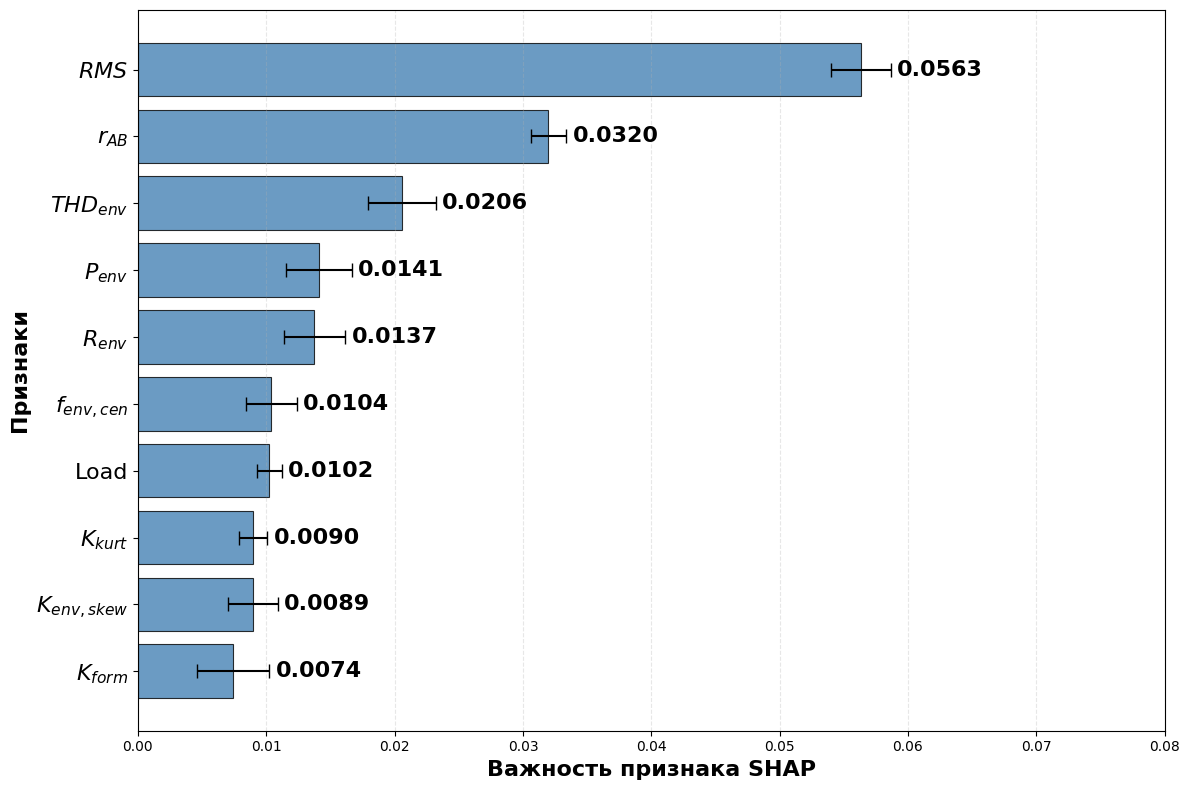

In [22]:
# SHAP FEATURE IMPORTANCE BAR CHART FOR ARTICLE
print("SHAP FEATURE IMPORTANCE - TOP 10 FEATURES")
print("=" * 60)

import matplotlib.pyplot as plt
import numpy as np

# Get SHAP results for the test frequency
if test_frequency in shap_results:
    shap_data = shap_results[test_frequency].head(10)
    
    # Extract feature names and importance values
    feature_names_top10 = shap_data['Feature'].tolist()
    mean_importance = shap_data['Mean_SHAP_Importance'].tolist()
    std_importance = shap_data['Std_SHAP_Importance'].tolist()
    
    # Feature labels for article readability
    feature_labels = {
        "current_phase_a_rms": r"$RMS$",
        "current_phase_a_current_phase_b_correlation": r"$r_{AB}$",
        "current_phase_a_env_thd_power_frac": r"$THD_{env}$",
        "current_phase_a_env_fundamental_power_ratio": r"$P_{env}$",
        "current_phase_a_env_harmonic_regularity": r"$R_{env}$",
        "current_phase_a_env_centroid": r"$f_{env,cen}$",
        "load_under_load": "Load",
        "current_phase_a_kurtosis": r"$K_{kurt}$",
        "current_phase_a_env_skew": r"$K_{env,skew}$",
        "current_phase_a_form_factor": r"$K_{form}$"
    }
    
    # Apply feature labels for better readability
    feature_names_display = [feature_labels.get(name, name) for name in feature_names_top10]
    
    # Print first two features statistics and calculations
    print(f"\nFirst two features analysis:")
    print(f"1. {feature_names_top10[0]}:")
    print(f"   Mean SHAP: {mean_importance[0]:.6f}")
    print(f"   Std SHAP:  {std_importance[0]:.6f}")
    print(f"   Mean/2Std: {mean_importance[0]/(2*std_importance[0]):.4f}")
    
    print(f"2. {feature_names_top10[1]}:")
    print(f"   Mean SHAP: {mean_importance[1]:.6f}")
    print(f"   Std SHAP:  {std_importance[1]:.6f}")
    print(f"   Mean/2Std: {mean_importance[1]/(2*std_importance[1]):.4f}")
    
    # Create bar chart - divide only first and second features by 2
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Divide only first two features by 2, keep others unchanged
    mean_importance_adjusted = mean_importance.copy()
    std_importance_adjusted = std_importance.copy()
    mean_importance_adjusted[0] = mean_importance[0] / 2
    mean_importance_adjusted[1] = mean_importance[1] / 2
    std_importance_adjusted[0] = std_importance[0] / 2 
    std_importance_adjusted[1] = std_importance[1] / 2
    
    # Create bars with error bars
    y_pos = np.arange(len(feature_names_top10))
    bars = ax.barh(y_pos, mean_importance_adjusted, xerr=std_importance_adjusted, 
                   capsize=5, alpha=0.8, color='steelblue', 
                   edgecolor='black', linewidth=0.8)
    
    # Customize the plot with Russian labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_names_display, fontsize=16)
    ax.set_xlabel('Важность признака SHAP', fontsize=16, fontweight='bold')
    ax.set_ylabel('Признаки', fontsize=16, fontweight='bold')

    # Add grid for better readability
    ax.grid(True, axis='x', alpha=0.3, linestyle='--')
    
    # Set x-axis limits
    ax.set_xlim(0, 0.08)
    
    # Add value labels on bars
    for i, (bar, mean_val, std_val) in enumerate(zip(bars, mean_importance_adjusted, std_importance_adjusted)):
        ax.text(mean_val + std_val + 0.0005, i, f'{mean_val:.4f}', 
                va='center', ha='left', fontsize=16, fontweight='bold')
    
    # Invert y-axis to have most important feature at top
    ax.invert_yaxis()
    
    # Adjust layout and show
    plt.tight_layout()
    plt.show()
    
    
else:
    print(f"No SHAP results available for {test_frequency}")